# Boosting for prediction

### Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn import datasets, metrics, model_selection

### Reading Data

In [2]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df = pd.read_excel(xlsx, '1x 5s')
dataset= df.copy()

#### Split the data into train and test

In [3]:
# the 'sample' method takes a certain fraction randomly
#Note that we use `random_state` to ensure the reproducibility of the examples.
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Splitting the train and test data into input and target


In [4]:

# split datat into input and target

train_input = train_dataset.copy()
test_input = test_dataset.copy()

train_target = train_input.pop('RHOB')
test_target = test_input.pop('RHOB')



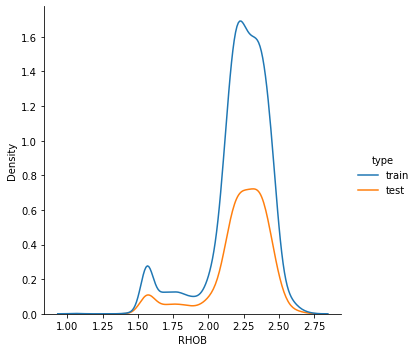

In [5]:
# let's invitigate the kde in the target and trainings

df_train = pd.DataFrame(train_target, columns=['RHOB'])
df_train['type'] = 'train'

df_test = pd.DataFrame(test_target, columns=['RHOB'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.displot(df_set, x="RHOB" ,hue="type", kind="kde", log_scale=False)

In [6]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, booster='gbtree')
model.fit(train_input, train_target
         )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'Predicted')

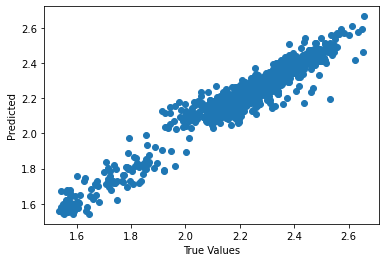

In [7]:
predicted = model.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
# _ = ax.plot([0, predicted.max()], [0, predicted.max()], ls='-', color='red')

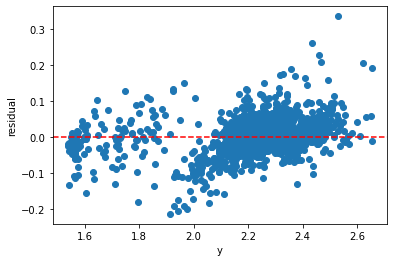

In [8]:
residual =test_target - predicted

fig, ax = plt.subplots()
ax.scatter(test_target, residual)
ax.set_xlabel('y')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

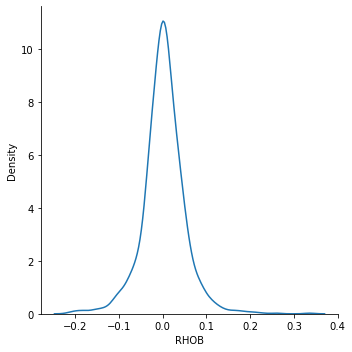

In [9]:
_ = sns.displot(residual, kind="kde");

In [10]:
print("r2 score: {}".format(metrics.r2_score(test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error(test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.9489507788017528
mse: 0.002444392904524428
rmse: 0.04944080202145216
mae: 0.03447027362779875


In [11]:
# help(model)

# Predict from a different well

In [12]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df2 = pd.read_excel(xlsx, '1x 4s')
dataset2= df2.copy()


# split datat into input and target

inputs2 = dataset2.copy()
target2 = inputs2.pop('RHOB')


D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'predicted')

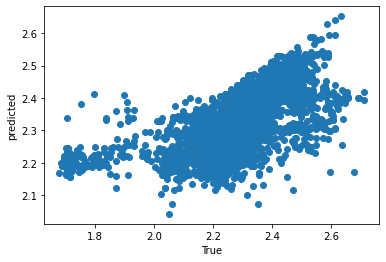

In [13]:
# predicted = model.predict(test_input)

predicted2 = model.predict(inputs2)
fig, ax= plt.subplots()
ax.scatter(target2,predicted2)
ax.set_xlabel("True")
ax.set_ylabel("predicted")

In [14]:
print("r2 score: {}".format(metrics.r2_score( target2, predicted2)))
print("mse: {}".format(metrics.mean_squared_error( target2, predicted2)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error( target2, predicted2))))
print("mae: {}".format(metrics.mean_absolute_error( target2, predicted2)))

r2 score: 0.3617772296023639
mse: 0.01511242016997508
rmse: 0.12293258384161247
mae: 0.0827995859147494


Text(0.5, 0, 'RHOB')

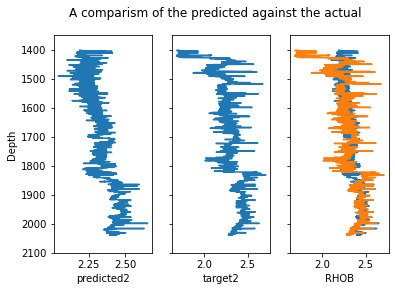

In [21]:
#plot subplots of predicted and actual
inputs2 = dataset2.copy()
Depth2= inputs2.pop("DEPTH")


fig, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True)
fig.suptitle('A comparism of the predicted against the actual')
ax1.set_ylabel("Depth")
ax1.set_ylim(2100, 1350)  # decreasing time
ax1.plot(predicted2,Depth2)
ax1.set_xlabel('predicted2')
# ax1.set_xlim(max(Depth2)+50, min(Depth2)-50)  # inverse depth

ax2.plot(target2,Depth2)
ax2.set_xlabel("target2")


ax3.plot(predicted2,Depth2)
ax3.plot(target2, Depth2)
ax3.set_xlabel("RHOB")
